In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [5]:
# load the dataset
df = pd.read_csv(r"C:\NISHANT\Practice\Machine Learning\marketing_data.csv")

# basic inspection
print(df.head())
print(df.describe())
print(df.isnull().sum())

   User_ID     Likes    Shares  Comments  Clicks  Engagement_with_Ads  \
0        1  0.006024  0.768844      0.44    0.26             0.733333   
1        2  0.841365  0.482412      0.53    0.74             0.466667   
2        3  0.847390  0.351759      0.43    0.12             0.000000   
3        4  0.698795  0.291457      0.27    0.76             0.500000   
4        5  0.548193  0.130653      0.86    0.38             0.700000   

   Time_Spent_on_Platform  Purchase_History Engagement_Level  \
0                0.919463                 0              Low   
1                0.697987                 0             High   
2                0.187919                 1              Low   
3                0.885906                 0             High   
4                0.885906                 1              Low   

   Purchase_Likelihood  ...    coupon      deal  discount  exclusive  \
0                    0  ...  0.570089  0.000000  0.000000   0.000000   
1                    1  ...  0.0

In [10]:
# Process the data

# handle missing values

# drop rows with missing values if any
df = df.dropna()

# confrim no missing values remain
print(df.isnull().sum())

# Encoding categorical variables

# encode "Engagement_level" ti numerical
encoder = LabelEncoder()
df["Engagement_Level"] = encoder.fit_transform(df["Engagement_Level"])

# print encoded values
print(df["Engagement_Level"].value_counts())

# scale features
features_to_scale = [
    "Likes",
    "Shares",
    "Comments",
    "Clicks",
    "Engagement_with_Ads",
    "Time_Spent_on_Platform",
]
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Preview scaled features
print(df[features_to_scale].head())

User_ID                   0
Likes                     0
Shares                    0
Comments                  0
Clicks                    0
Engagement_with_Ads       0
Time_Spent_on_Platform    0
Purchase_History          0
Engagement_Level          0
Purchase_Likelihood       0
brand                     0
buy                       0
coupon                    0
deal                      0
discount                  0
exclusive                 0
limited                   0
new                       0
offer                     0
product                   0
sale                      0
shopping                  0
dtype: int64
Engagement_Level
0    176
2    164
1    160
Name: count, dtype: int64
      Likes    Shares  Comments    Clicks  Engagement_with_Ads  \
0 -1.710228  0.895978 -0.202448 -0.818813             0.821120   
1  1.140906 -0.064685  0.124902  0.765475            -0.082451   
2  1.161467 -0.502882 -0.238820 -1.280897            -1.663700   
3  0.654294 -0.705126 -0.820775  0.83

In [13]:
# Split the data

X = df.drop(columns=["Purchase_Likelihood", "User_ID"])
y = df["Purchase_Likelihood"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# print the shape of datasets
print("Training Features Shape:", X_train.shape)
print("Training Features Shape:", X_test.shape)

Training Features Shape: (350, 20)
Training Features Shape: (150, 20)


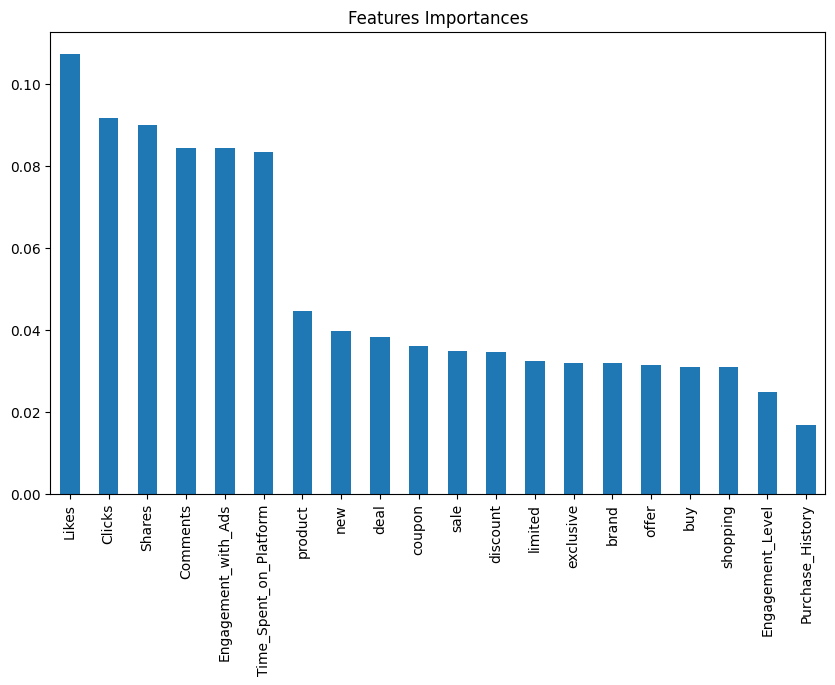

In [16]:
# train the model

# intialize the random forest classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)

# train the model on training data
model.fit(X_train, y_train)

# print feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(
    kind="bar", figsize=(10, 6), title="Features Importances"
)
plt.show()

In [18]:
# Evaluate the model

# make predictions
y_pred = model.predict(X_test)

# classification report
print("classification report :\n", classification_report(y_test, y_pred))

# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

# AUC-ROC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("AUC-ROC Score : ", roc_auc)

classification report :
               precision    recall  f1-score   support

           0       0.46      0.53      0.49        72
           1       0.50      0.44      0.47        78

    accuracy                           0.48       150
   macro avg       0.48      0.48      0.48       150
weighted avg       0.48      0.48      0.48       150

Accuracy :  0.48
AUC-ROC Score :  0.5071225071225072


In [19]:
import joblib

# Save the model
joblib.dump(model, "random_forest_model.pkl")

# Save predictions
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("model_predictions.csv", index=False)

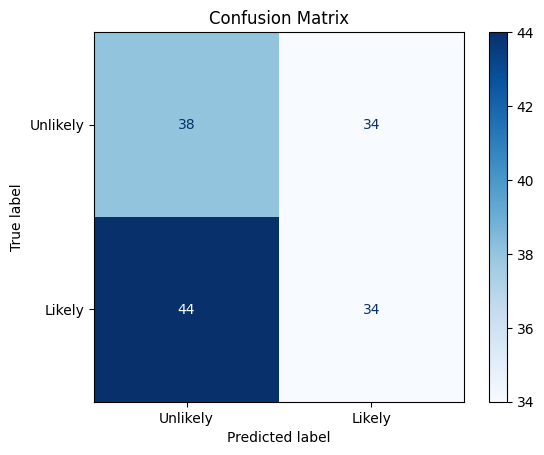

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=["Unlikely", "Likely"], cmap="Blues"
)
plt.title("Confusion Matrix")
plt.show()